In [53]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
data = pd.read_csv('BankChurners.csv')

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [68]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [69]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [70]:
{column: list(data[column].unique())
 for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [9]:
print (data['Education_Level'].mode())
print(data['Income_Category'].mode())

0    Graduate
Name: Education_Level, dtype: object
0    Less than $40K
Name: Income_Category, dtype: object


# Preprocessing

In [10]:
# def preprocess_inputs(df):
#   df=df.copy()
#   # Drop last two columns
#   df = df.drop(df.columns[-2:], axis = 1)
#   # Drop CLIENTUM column
#   df = df.drop ('CLIENTNUM', axis = 1)
#   #Nan "unknown"
#   df=df.replace('Unknown', np.NaN)
  
#   #Fill NaN with mode
#   df['Education_Level'] = df["Education_Level"].fillna('Graduate')
#   df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
  
#   y=df['Attrition_Flag'].copy()
#   X = df.drop('Attrition_Flag', axis = 1).copy()
#   return X, y

In [48]:
from sklearn.impute import SimpleImputer
def preprocess_inputs(df):
    df = df.copy()

    # Drop last two columns
    df = df.drop(df.columns[-2:], axis=1)

    # Drop CLIENTNUM column
    df = df.drop('CLIENTNUM', axis=1)

    # Replace 'Unknown' with NaN for consistent missing value handling
    df = df.replace('Unknown', np.nan)

    # Setup SimpleImputer to fill NaN values with the mode
    mode_imputer = SimpleImputer(strategy='most_frequent')

    # Apply the imputer to the specified columns
    df['Education_Level'] = mode_imputer.fit_transform(
        df[['Education_Level']])[:, 0]
    df['Income_Category'] = mode_imputer.fit_transform(
        df[['Income_Category']])[:, 0]

    # Separate the labels and the features
    y = df['Attrition_Flag'].copy()
    X = df.drop('Attrition_Flag', axis=1).copy()

    return X, y

In [49]:
X, y = preprocess_inputs(data)

In [50]:
X

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School            NaN   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2        Graduate       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate            NaN   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0         $60K - $80K          Blue              39                         5   
1      Less than $40K          Blue              44                         6   
2        $80K - $120K          Blue              36                         4   
3      Less than $40K          Blue              34                         3   
4         $60K - $80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122     $40K - $60K          Blue              40                         3   
10123     $40K - $60K          Blue              25                         4   
10124  Less than $40K          Blue              36                         5   
10125     $40K - $60K          Blue              36                         4   
10126  Less than $40K        Silver              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3       12691.0   
1                           1                      2        8256.0   
2                           1                      0        3418.0   
3                           4                      1        3313.0   
4                           1                      0        4716.0   
...                       ...                    ...           ...   
10122                       2                      3        4003.0   
10123                       2                      3        4277.0   
10124                       3                      4        5409.0   
10125                       3                      3        5281.0   
10126                       2                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...           

In [51]:
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [52]:
X.isna().sum()

Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status              749
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

In [90]:
def binary_encode (df, column, positive_value):
  df=df.copy()
  df[column] = df[column].apply(lambda x:1 if x==positive_value else 0)
  return df

In [91]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [92]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [93]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop last two columns (unneeded)
    df = df.drop(df.columns[-2:], axis=1)

    # Drop CLIENTNUM columns
    df = df.drop('CLIENTNUM', axis=1)

    # Encode unknown values as np.NaN
    df = df.replace('Unknown', np.NaN)

    # Setup SimpleImputer to fill NaN values with the mode
    mode_imputer = SimpleImputer(strategy='most_frequent')

    # Apply the imputer to the specified columns
    df['Education_Level'] = mode_imputer.fit_transform(
        df[['Education_Level']])[:, 0]
    df['Income_Category'] = mode_imputer.fit_transform(
        df[['Income_Category']])[:, 0]

    # Encode binary columns
    df = binary_encode(df, 'Attrition_Flag',
                       positive_value='Attrited Customer')
    df = binary_encode(df, 'Gender', positive_value='M')

    # Encode ordinal columns
    education_ordering = [
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
    ]
    income_ordering = [
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'
    ]
    df = ordinal_encode(df, 'Education_Level', ordering=education_ordering)
    df = ordinal_encode(df, 'Income_Category', ordering=income_ordering)

    # Encode nominal columns
    df = onehot_encode(df, 'Marital_Status', prefix='MS')
    df = onehot_encode(df, 'Card_Category', prefix='CC')

    # Split df into X and y
    y = df['Attrition_Flag'].copy()
    X = df.drop('Attrition_Flag', axis=1).copy()

    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

In [86]:
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd


def preprocess_inputs(df):
    df = df.copy()

    # Ensure that 'Attrition_Flag' is present
    if 'Attrition_Flag' not in df.columns:
        raise KeyError("Column 'Attrition_Flag' not found in DataFrame")

    # Check and drop the 'CLIENTNUM' column if present
    if 'CLIENTNUM' in df.columns:
        df = df.drop('CLIENTNUM', axis=1)

    # Replace 'Unknown' with np.NaN
    df.replace('Unknown', np.nan, inplace=True)

    # Define ordering for ordinal encoding
    education_ordering = ['Uneducated', 'High School',
                          'College', 'Graduate', 'Post-Graduate', 'Doctorate']
    income_ordering = ['Less than $40K', '$40K - $60K',
                       '$60K - $80K', '$80K - $120K', '$120K +']

    # Separate target before any column manipulation
    y = df['Attrition_Flag']
    df = df.drop('Attrition_Flag', axis=1)

    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('impute_then_encode', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal', OrdinalEncoder(categories=[
                 education_ordering, income_ordering]))
            ]), ['Education_Level', 'Income_Category']),
            ('binary', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
                # Adjusted to drop 'if_binary' to handle binary encoding
                ('binarizer', OneHotEncoder(drop='if_binary'))
            ]), ['Gender']),
            ('onehot', OneHotEncoder(), ['Marital_Status', 'Card_Category'])
        ],
        remainder='passthrough'
    )

    # Apply transformations
    X = preprocessor.fit_transform(df)

    # Convert y to binary using LabelBinarizer
    y = LabelBinarizer().fit_transform(y.to_numpy())
    y = y.ravel()  # Convert from a 2D array to a 1D array

    # Convert transformed X back to DataFrame with appropriate column names
    columns = preprocessor.get_feature_names_out()
    X = pd.DataFrame(X, columns=columns)

    # Scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    # Re-convert to DataFrame after scaling
    X = pd.DataFrame(X, columns=columns)

    return X, y  # ensure y is a flat array suitable for model training

In [94]:
X, y = preprocess_inputs(data)

In [95]:
X

Customer_Age    Gender  Dependent_count  Education_Level  \
0         -0.165406  1.059956         0.503368        -0.893680   
1          0.333570 -0.943436         2.043199         0.593388   
2          0.583058  1.059956         0.503368         0.593388   
3         -0.789126 -0.943436         1.273283        -0.893680   
4         -0.789126  1.059956         0.503368        -1.637214   
...             ...       ...              ...              ...   
10122      0.458314  1.059956        -0.266547         0.593388   
10123     -0.664382  1.059956        -0.266547         0.593388   
10124     -0.290150 -0.943436        -1.036462        -0.893680   
10125     -2.036565  1.059956        -0.266547         0.593388   
10126     -0.414894 -0.943436        -0.266547         0.593388   

       Income_Category  Months_on_book  Total_Relationship_Count  \
0             0.597300        0.384621                  0.763943   
1            -0.887628        1.010715                  1.407306   
2             1.339764        0.008965                  0.120579   
3            -0.887628       -0.241473                 -0.522785   
4             0.597300       -1.869317                  0.763943   
...                ...             ...                       ...   
10122        -0.145164        0.509840                 -0.522785   
10123        -0.145164       -1.368442                  0.120579   
10124        -0.887628        0.008965                  0.763943   
10125        -0.145164        0.008965                  0.120579   
10126        -0.887628       -1.368442                  1.407306   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   -1.327136               0.492404      0.446622   
1                   -1.327136              -0.411616     -0.041367   
2                   -1.327136              -2.219655     -0.573698   
3                    1.641478              -1.315636     -0.585251   
4                   -1.327136              -2.219655     -0.430877   
...                       ...                    ...           ...   
10122               -0.337598               0.492404     -0.509330   
10123               -0.337598               0.492404     -0.479181   
10124                0.651940               1.396424     -0.354626   
10125                0.651940               0.492404     -0.368710   
10126               -0.337598               1.396424      0.193220   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                -0.473422         0.488971              2.623494   
1                -0.366667        -0.008486              3.563293   
2                -1.426858        -0.445658              8.367214   
3                 1.661686        -0.734100              2.942843   
4                -1.426858        -0.302868              6.455682   
...                    ...              ...                   ...   
10122             0.844455        -0.584929             -0.259771   
10123             1.255524        -0.591639              0.201004   
10124            -1.426858        -0.226632              0.269436   
10125            -1.426858        -0.240713             -1.026208   
10126             0.979433         0.105372             -0.259771   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0            -0.959707       -0.973895             3.834003   
1            -0.916433       -1.357340            12.608573   
2            -0.740982       -1.911206             6.807864   
3            -0.951758       -1.911206             6.807864   
4            -1.056263       -1.570365             7.509325   
...                ...             ...                  ...   
10122         3.259358        2.221481             0.608119   
10123         1.283475        0.176440            -0.122745   
10124         1.732994       -0.207005             0.444305   
10125         1.174848       -0.121795             0.041070   
10126         1.733877

In [96]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [22]:
# Excluding categorical columns
analysis_df = pd.concat([X.loc[:, ['Customer_Age', 'Months_on_book']], X.loc[:, 'Credit_Limit':'Avg_Utilization_Ratio']], axis=1).copy()

In [23]:
analysis_df

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
0         -0.165406        0.384621      0.446622            -0.473422   
1          0.333570        1.010715     -0.041367            -0.366667   
2          0.583058        0.008965     -0.573698            -1.426858   
3         -0.789126       -0.241473     -0.585251             1.661686   
4         -0.789126       -1.869317     -0.430877            -1.426858   
...             ...             ...           ...                  ...   
10122      0.458314        0.509840     -0.509330             0.844455   
10123     -0.664382       -1.368442     -0.479181             1.255524   
10124     -0.290150        0.008965     -0.354626            -1.426858   
10125     -2.036565        0.008965     -0.368710            -1.426858   
10126     -0.414894       -1.368442      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
3            -0.734100              2.942843        -0.951758       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
...                ...                   ...              ...             ...   
10122        -0.584929             -0.259771         3.259358        2.221481   
10123        -0.591639              0.201004         1.283475        0.176440   
10124        -0.226632              0.269436         1.732994       -0.207005   
10125        -0.240713             -1.026208         1.174848       -0.121795   
10126         0.105372             -0.259771         1.733877       -0.164400   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                 3.834003              -0.775882  
1                12.608573              -0.616276  
2                 6.807864              -0.997155  
3                 6.807864               1.759686  
4                 7.509325              -0.997155  
...                    ...                    ...  
10122             0.608119               0.678714  
10123            -0.122745               0.856458  
10124             0.444305              -0.997155  
10125             0.041070              -0.997155  
10126            -0.265557              -0.311572  

[10127 rows x 10 columns]

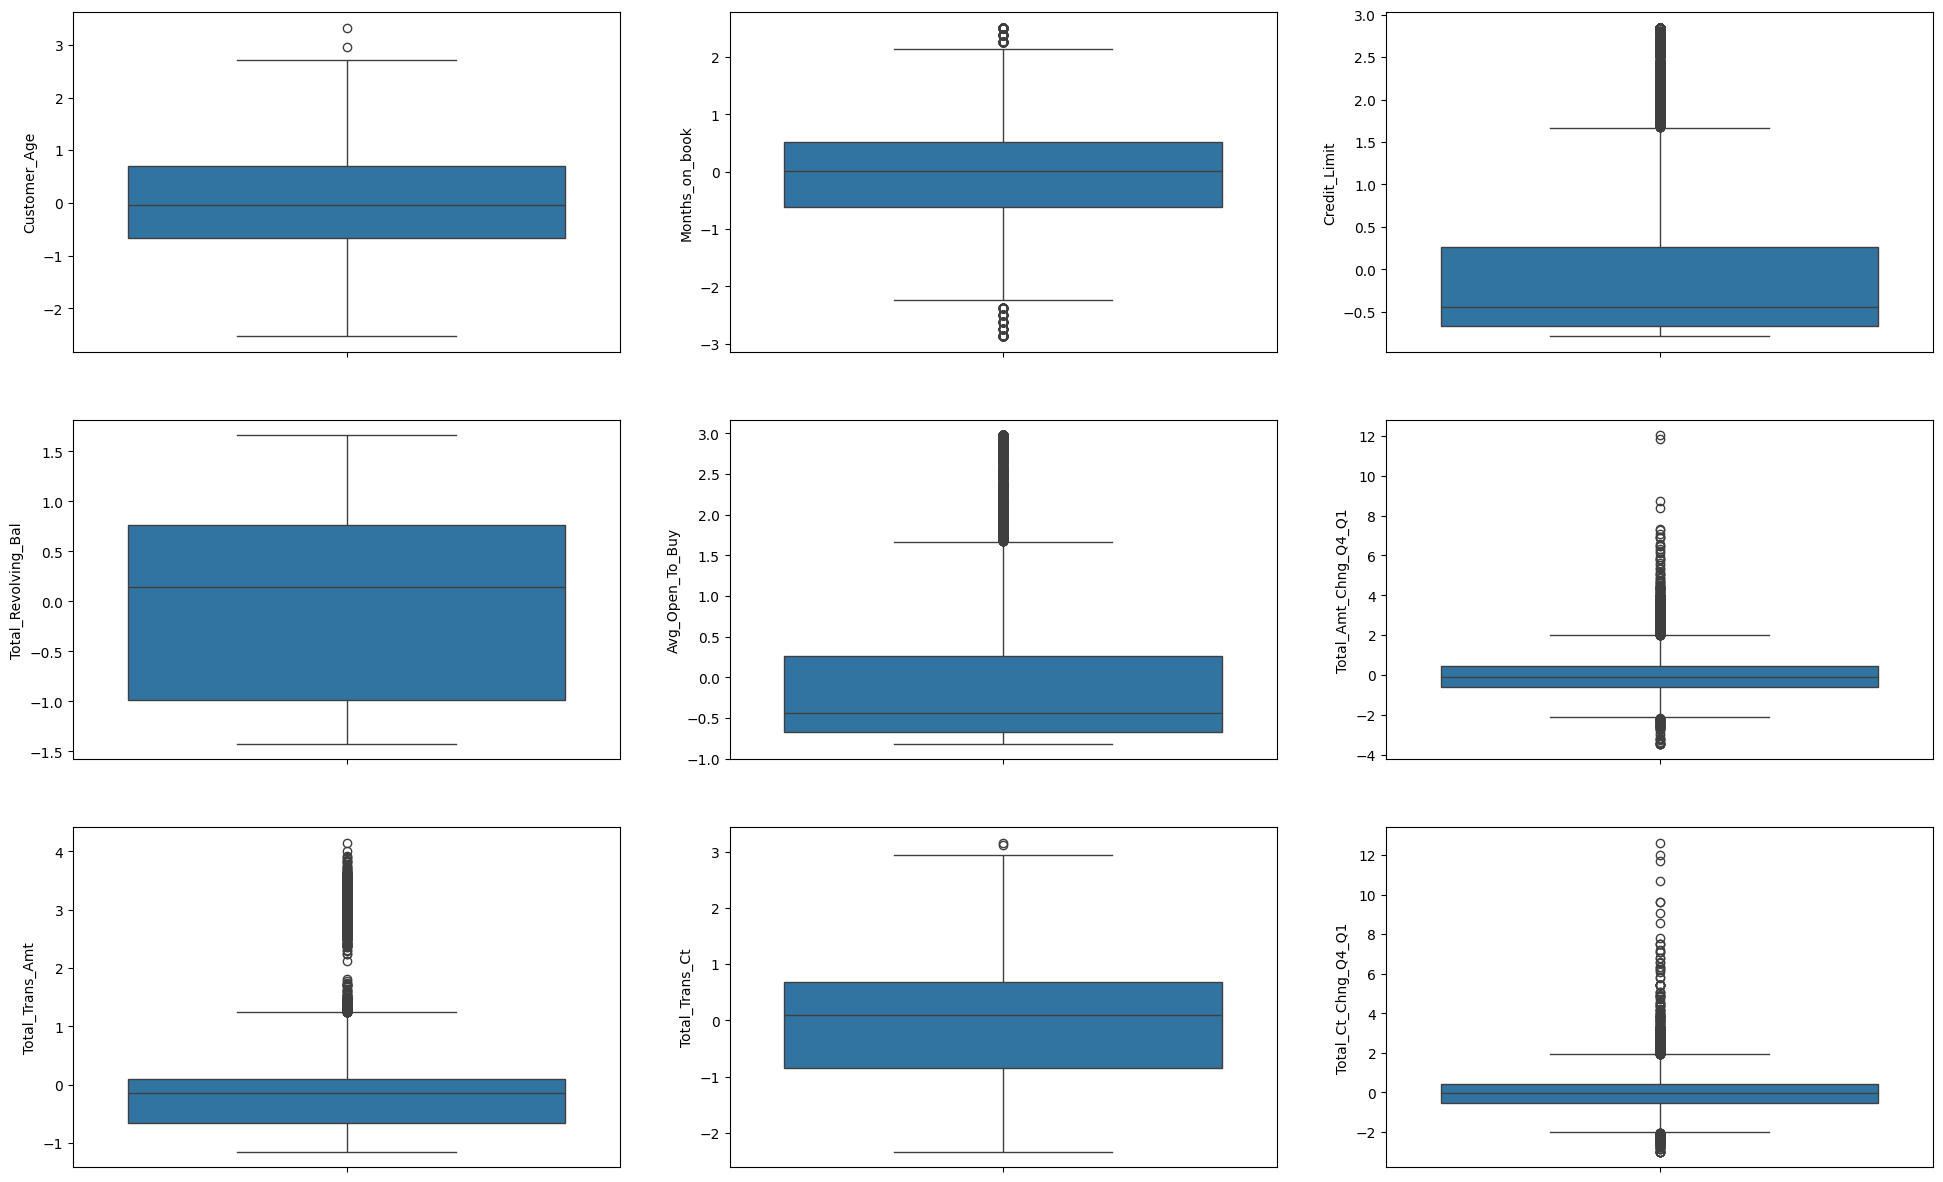

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 15))

for i in range(len(analysis_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(analysis_df[analysis_df.columns[i]])

plt.show()

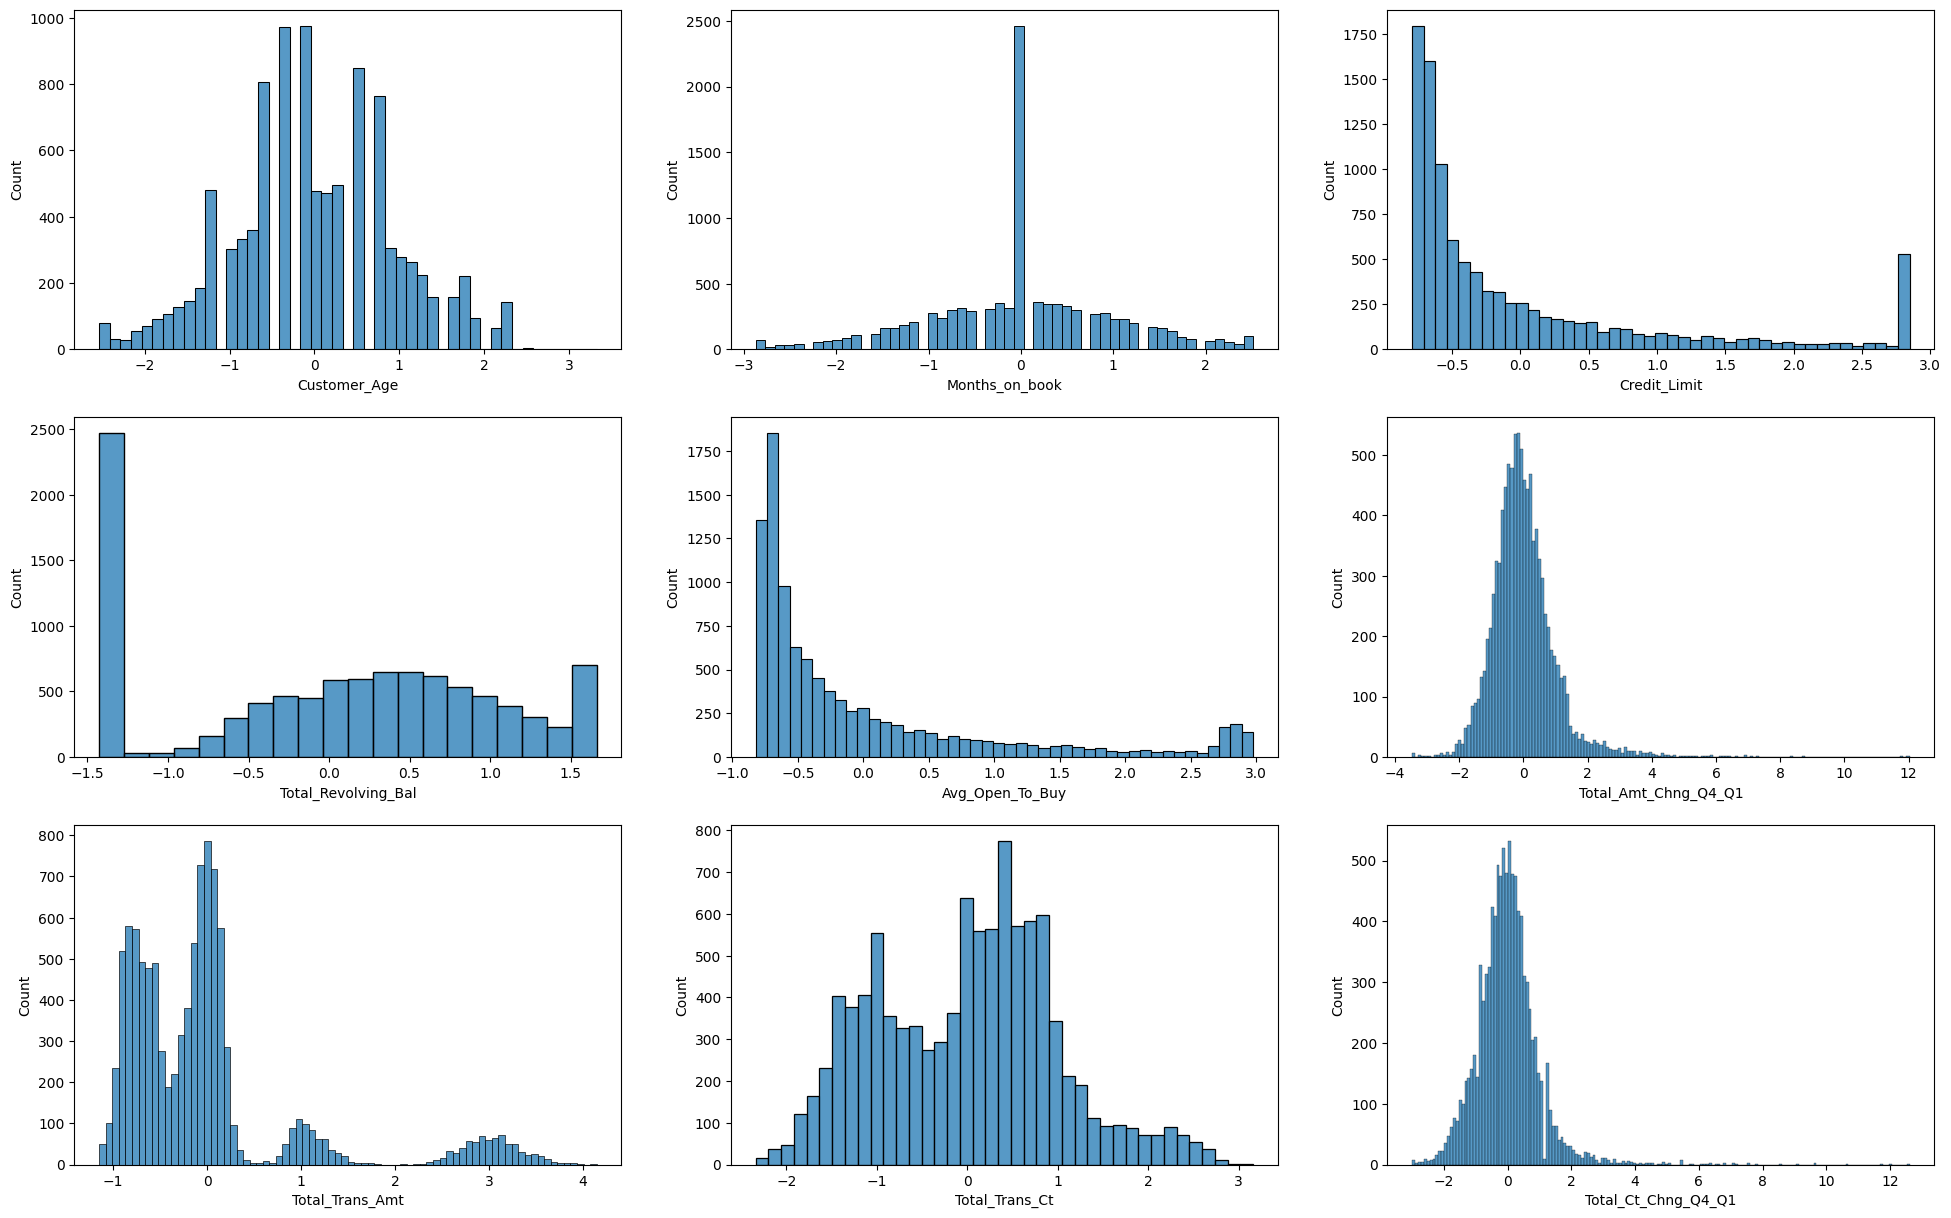

In [25]:
plt.figure(figsize=(24, 15))

for i in range(len(analysis_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.histplot(analysis_df[analysis_df.columns[i]])

plt.show()

<Figure size 2000x2000 with 0 Axes>

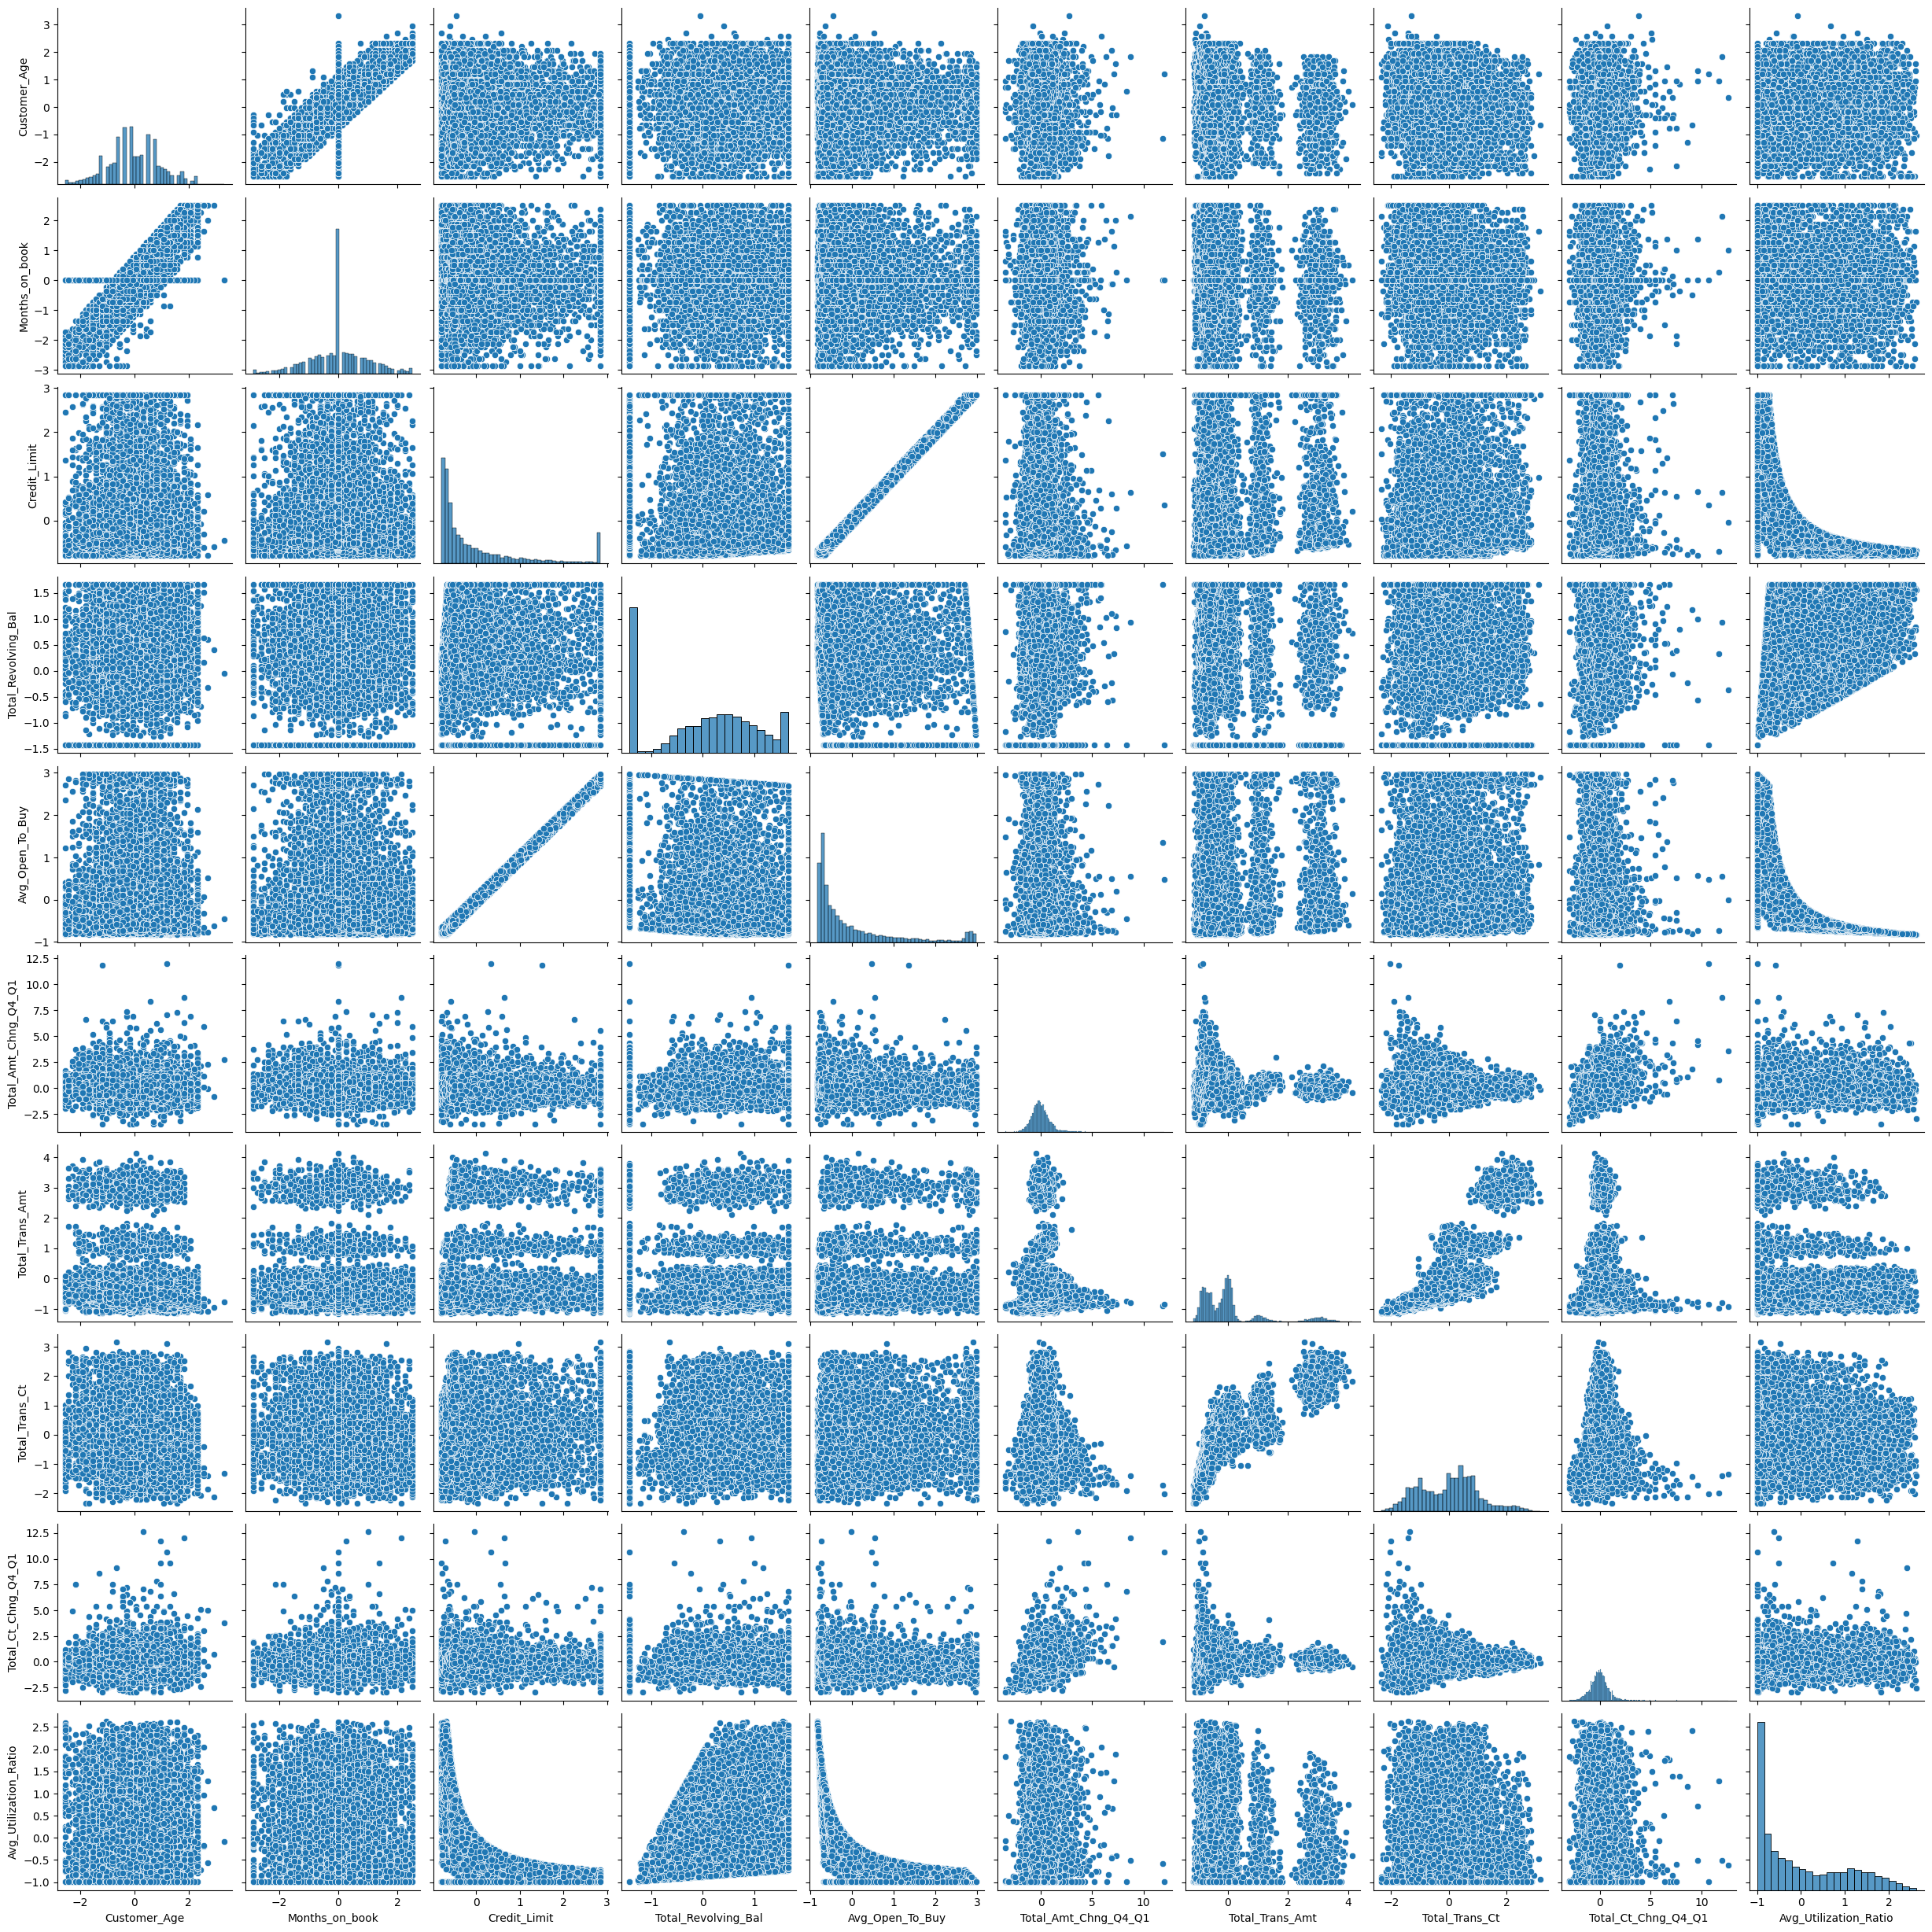

In [26]:
plt.figure(figsize=(20, 20))
sns.pairplot(analysis_df)
plt.show()

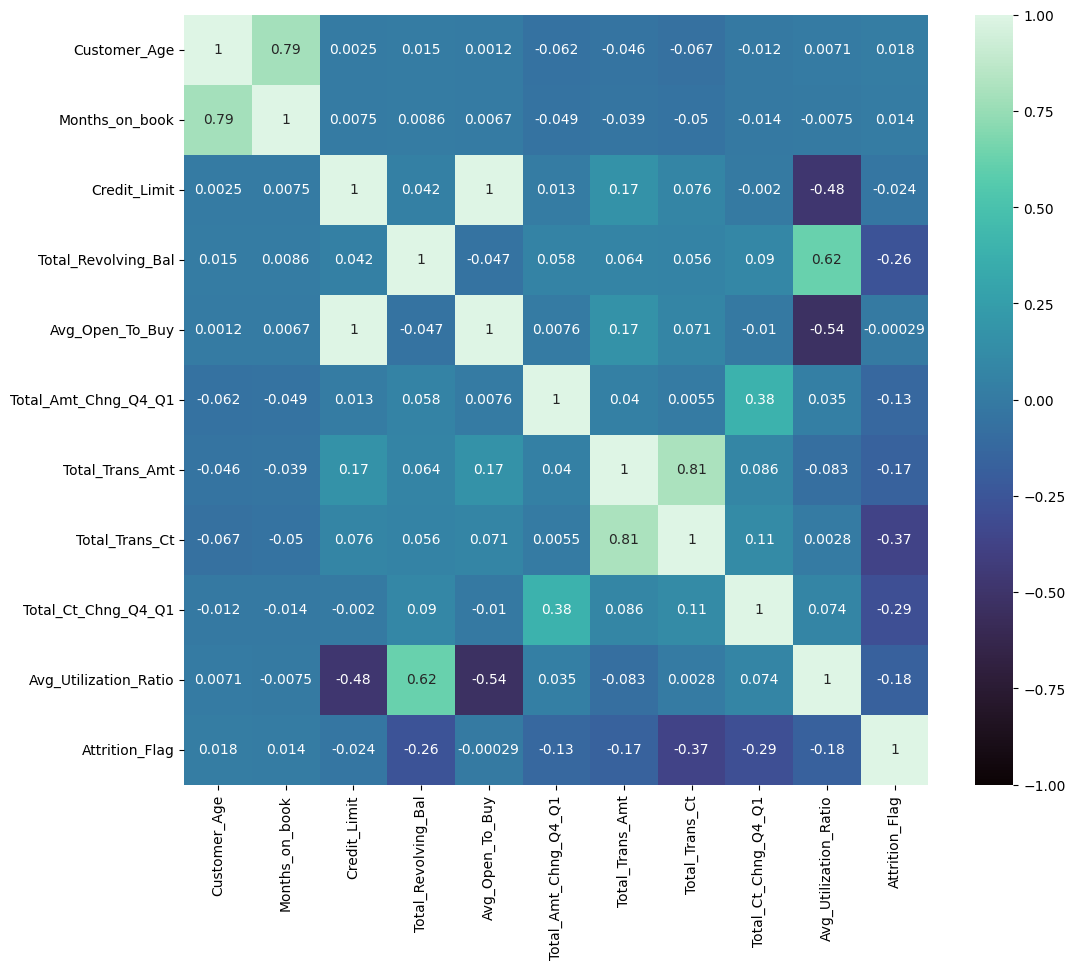

In [27]:
corr = pd.concat([analysis_df, y], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=42)

In [33]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)

c:\Users\ygale\OneDrive\Рабочий стол\becode_projects\Churn-prediction\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 89.9531%
Support Vector Machine: 90.8788%
         Decision Tree: 92.4833%
        Neural Network: 92.3352%
         Random Forest: 93.6312%


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6798
           1       0.92      0.67      0.77      1304

    accuracy                           0.94      8102
   macro avg       0.93      0.83      0.87      8102
weighted avg       0.94      0.94      0.93      8102



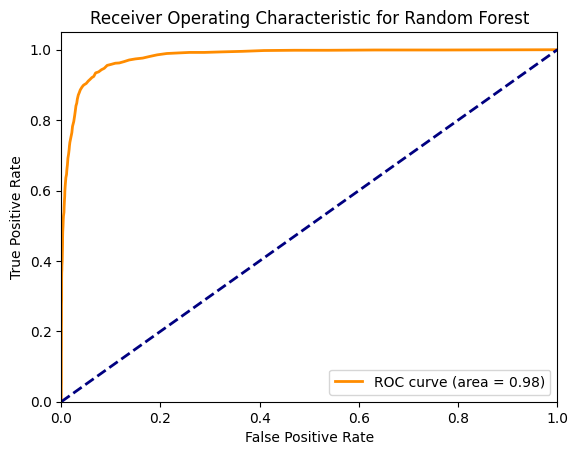

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

# Reference to the Random Forest model

random_forest_model = models[4]

# Prediction and Classification Report
y_pred = random_forest_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Compute probabilities for the positive class
y_probs = random_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6798
           1       0.76      0.78      0.77      1304

    accuracy                           0.92      8102
   macro avg       0.86      0.87      0.86      8102
weighted avg       0.93      0.92      0.93      8102



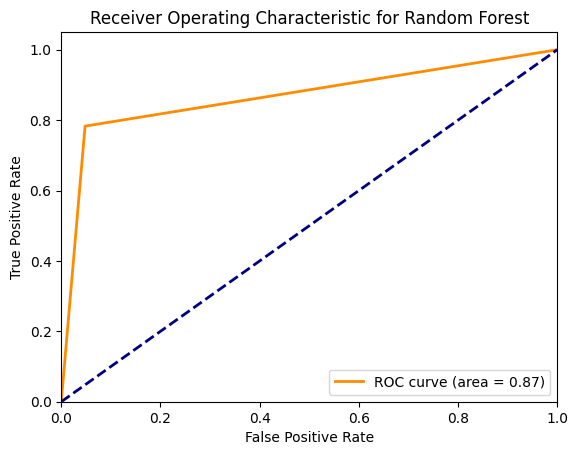

In [37]:




decision_tree_model = models[2]

# Prediction and Classification Report
y_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Compute probabilities for the positive class
y_probs = decision_tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()